In [303]:
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt

In [304]:
img1 = iio.imread('Image1.png').astype(np.float64)
img2 = iio.imread('Image2.png').astype(np.float64)
mask = iio.imread('Mask.png').astype(np.float64)
#print((mask[500,300]/255).astype(bool))
#iio.imwrite('Blended.png',img1+(img2-img1)*(mask/255).astype(np.uint8))
img1F = np.fft.fftshift(np.fft.fft2(img1))
img2F = np.fft.fftshift(np.fft.fft2(img2))
maskF = np.fft.fftshift(np.fft.fft2(mask))
print(img1.astype(float).dtype)

[ True  True  True  True]
float64


In [342]:
def blur(img, sigma):
    (m, n) = img.shape
    H = np.zeros((m, n)) #
    cy, cx = n/2, m/2
    x = np.linspace(0, n, n)
    y = np.linspace(0, m, m)
    X, Y = np.meshgrid(x, y)
    H[:,:] = np.exp(-(((X-cx)/sigma)**2 + ((Y-cy)/sigma)**2))
    imageF = np.fft.fft2(img)
    imageF = np.fft.fftshift(imageF)
    finalF = imageF*H
    final = np.fft.ifft2(np.fft.ifftshift(finalF))
    final = np.real(final)
    N = np.max(img)/np.abs(np.max(final))
    final = final*N
    #print(img[100,100]/np.abs(final[100,100]))
    print(np.max(img)/np.abs(np.max(final)), N)
    #plt.imshow(np.abs(final));
    return final

In [343]:
img1G = []
img2G = []
maskG = []
(m, n, color) = img1.shape
sigmas = [1000, 600, 400, 300, 250, 220, 200, 190, 180, 170, 160, 150, 100]

img1F = np.fft.fftshift(np.fft.fft2(img1))
img2F = np.fft.fftshift(np.fft.fft2(img2))
maskF = np.fft.fftshift(np.fft.fft2(mask))

for i in range(len(sigmas)):
    sigma = sigmas[i]
    
    img1 = iio.imread('Image1.png')
    temp = img1.astype(np.float64)
    temp[:,:,0] = blur(temp[:,:,0],sigma)
    temp[:,:,1] = blur(temp[:,:,1],sigma)
    temp[:,:,2] = blur(temp[:,:,2],sigma)
    temp[:,:,3] = blur(temp[:,:,3],sigma)
    img1G.append(temp.astype(np.uint8))
    iio.imwrite('tests/bigMasoud'+str(i+1)+'.png',(np.abs(temp)))
    
    img2 = iio.imread('Image2.png')
    temp = img2.astype(np.float64)
    temp[:,:,0] = blur(temp[:,:,0],sigma)
    temp[:,:,1] = blur(temp[:,:,1],sigma)
    temp[:,:,2] = blur(temp[:,:,2],sigma)
    temp[:,:,3] = blur(temp[:,:,3],sigma)
    img2G.append(temp)
    
    mask = iio.imread('Mask.png')
    temp = mask.astype(np.float64)
    temp[:,:,0] = blur(temp[:,:,0],sigma)
    temp[:,:,1] = blur(temp[:,:,1],sigma)
    temp[:,:,2] = blur(temp[:,:,2],sigma)
    temp[:,:,3] = blur(temp[:,:,3],sigma)
    #temp = (temp>1).astype(int)
    #temp = temp*255
    maskG.append(temp.astype(np.uint8))


1.0 1.0488096550672508
1.0000000000000002 1.0468098414973481
1.0 1.0454805929855608
0.9999999999999999 1.0539384008327914


Lossy conversion from float64 to uint8. Range [0.00012530670405639277, 255.00000000000003]. Convert image to uint8 prior to saving to suppress this warning.


1.0 1.0550357770861518
1.0000000000000002 1.0540405789062348
1.0 1.0523707979441146
1.0000000000000002 1.0539383959152786
1.0 1.0389713244806467
0.9999999999999999 1.0389248799696087
1.0000000000000002 1.038921297669159
1.0 1.0540607217071951
1.0 1.1483143720084528
1.0 1.1448403047765172
1.0 1.142742958477169
1.0 1.1572890352648542


Lossy conversion from float64 to uint8. Range [6.021110264476219e-06, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1.0 1.1600459108077954
0.9999999999999999 1.157499942019464
1.0 1.152337666909019
1.0 1.1572694770545662
1.0 1.127039518012488
1.0 1.1268785432013395
1.0000000000000002 1.1268661214003997
0.9999999999999999 1.1574857135654966
1.0 1.3801458477834505
1.0 1.3764599128984374
1.0 1.3742374346599686
1.0000000000000002 1.3893903001305838


Lossy conversion from float64 to uint8. Range [0.0008507985958737102, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1.0 1.3947790348854325
1.0 1.3897616422296122
1.0 1.3859139321266776
1.0 1.3893264149799973
1.0 1.335600998860254
1.0 1.33558264268612
1.0 1.3356117110542522
1.0000000000000002 1.389665220986223
1.0 1.7622799204364676
1.0 1.7712786989229665
1.0 1.7677748313085935
1.0 1.7944195803908467


Lossy conversion from float64 to uint8. Range [8.942667406426042e-06, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1.0 1.8026134644507836
1.0 1.7947084972090508
1.0 1.7891197187669083
0.9999999999999999 1.7943187342438205
1.0 1.6631364086265645
1.0 1.6631266149418074
1.0 1.6631535053638091
1.0 1.7949921660986776
0.9999999999999999 2.1117679382406522
0.9999999999999999 2.136721989284507
1.0 2.154156535096581
1.0 2.320783565327967


Lossy conversion from float64 to uint8. Range [0.0004929774167973278, 255.00000000000003]. Convert image to uint8 prior to saving to suppress this warning.


1.0000000000000002 2.325593352738946
1.0000000000000002 2.3200162371654858
1.0 2.2828276936028984
1.0 2.3205308433705003
1.0000000000000002 2.0236256666298256
0.9999999999999999 2.0236220260446376
0.9999999999999999 2.0236405617389828
0.9999999999999999 2.3219351328785813
1.0000000000000002 2.4549181727467557
0.9999999999999999 2.497564537416699
1.0 2.5177876714090504
1.0 2.9655035333433797


Lossy conversion from float64 to uint8. Range [0.0008020616469425981, 255.00000000000003]. Convert image to uint8 prior to saving to suppress this warning.


1.0 2.9172723139478864
1.0 2.908835715642353
1.0 2.8064019083778837
0.9999999999999999 2.965086491471985
1.0000000000000002 2.392684692648551
1.0 2.3927477714089336
1.0000000000000002 2.392755105770838
1.0 2.967770923568047
1.0 2.7820693323440655
1.0 2.8328180408541375
1.0 2.872983711670423
1.0 3.72548730928828


Lossy conversion from float64 to uint8. Range [0.0002381016163621684, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1.0 3.58278260385693
1.0 3.488583322509901
1.0 3.3595164374565623
1.0 3.7246527874819195
0.9999999999999999 2.756723054044727
1.0 2.7567760013167115
1.0 2.756781495591143
1.0 3.7294153535342938
1.0 2.9881269658342617
1.0 3.0204791199865166
1.0 3.1016004270605504
0.9999999999999999 4.293893041595182


Lossy conversion from float64 to uint8. Range [0.00027990512595569986, 255.00000000000003]. Convert image to uint8 prior to saving to suppress this warning.


1.0000000000000002 4.015210839010147
1.0 3.883809515045285
1.0 3.7390087256770888
1.0000000000000002 4.292650546962453
1.0 2.9893331972317774
1.0 2.9893401116620084
1.0 2.9893458865156255
1.0 4.299292150599019
1.0 3.23028517290742
1.0 3.233388731705666
1.0 3.321338232698977
1.0 5.070709933669829


Lossy conversion from float64 to uint8. Range [0.000163083996085227, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1.0 4.323906488557075
1.0000000000000002 4.263175921194838
1.0 4.217976325473335
1.0 5.068786129008292
1.0 3.2633200934304387
1.0 3.2633245823644152
1.0 3.2633284120257797
0.9999999999999999 5.078428314335668
1.0 3.511020092714558
1.0 3.4779935640191075
1.0 3.569113733368223
1.0 6.171383620526315


Lossy conversion from float64 to uint8. Range [0.00014465514284908555, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1.0 4.688619856937903
1.0 4.602763401672342
1.0 4.573243457699136
1.0 6.168262586848239
1.0 3.5924594982068947
1.0 3.5924621497919196
1.0 3.592464465964246
0.9999999999999999 6.182986183463762
1.0 3.836119480490806
1.0 3.758829855733245
1.0 3.8534309766783577
1.0 7.801062673983017


Lossy conversion from float64 to uint8. Range [6.679673553682351e-05, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1.0 5.121064708201324
1.0 5.002931905935735
1.0 4.95390189977337
1.0 7.795695881773354
1.0 3.9888018308311373
1.0 3.9888032169108842
1.0 3.9888044603199404
1.0 7.8196745576047695
0.9999999999999999 4.165796330625494
1.0000000000000002 4.079288111322362
0.9999999999999999 4.170045390083349
0.9999999999999999 10.348557767863142


Lossy conversion from float64 to uint8. Range [0.0002559867709960069, 255.00000000000003]. Convert image to uint8 prior to saving to suppress this warning.


1.0 5.634456937369266
1.0 5.475533597750311
1.0 5.402336123875916
1.0 10.33881382477172
1.0000000000000002 4.465417275254042
0.9999999999999999 4.465417892211376
1.0 4.465418462938583
1.0 10.381263871245391
1.0 6.350984051985233
1.0 6.308366919942931
1.0 6.4647695883001575
1.0 183.66665135944373


Lossy conversion from float64 to uint8. Range [1.127678748081784e-06, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1.0 9.742139960532345
1.0 9.297034921407224
0.9999999999999999 9.07566191453475
0.9999999999999999 181.3797133161447
1.0 8.341902587175344
1.0000000000000002 8.35585481354191
1.0 8.355854813606244
1.0000000000000002 193.447453753587


Lossy conversion from float64 to uint8. Range [-17.965409219255427, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-20.757300415702197, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-14.568536442920305, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-16.806342706942928, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-18.945077095960983, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-20.3048517597571, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-11.725274282729458, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversio

2347.2382125190657


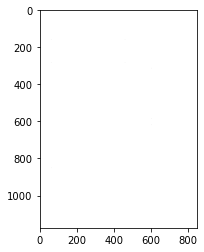

In [344]:
img1L = []
img2L = []
blendedL =[]
for i in range(len(sigmas)-1):
    img1L.append(img1G[i] - img1G[i+1])
    img2L.append(img2G[i] - img2G[i+1])
img1L.append(img1G[len(sigmas)-1])
img2L.append(img2G[len(sigmas)-1])

blended_image = np.zeros(img1.shape)
for i in range(len(sigmas)):
    temp = img1L[i]*(maskG[i]/255)+img2L[i]*(1-(maskG[i]/255))
    blendedL.append(temp)
    blended_image = blended_image + blendedL[i]
    iio.imwrite('tests/blended'+str(i)+'.png',(blendedL[i]))
print(np.max(blended_image))
#plt.imshow(255*np.abs(blended_image)/np.max(blended_image));
plt.imshow(blendedL[1].astype(np.uint8))
iio.imwrite('tests/blended'+str(100)+'.png',(np.abs(blended_image)).astype(np.uint8))